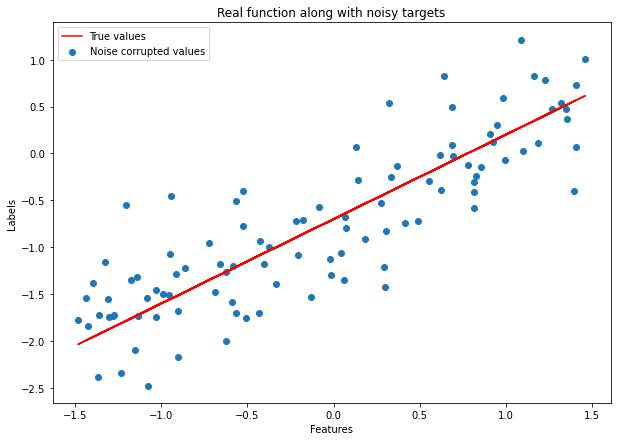

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from scipy.stats import norm as univariate_normal

# Generate noisy dataset
seed = 42
np.random.seed(seed)

n_datapoints = 100
intercept = -0.7
slope = 0.9
noise_std_dev = 0.5
noise_var = noise_std_dev**2
lower_bound = -1.5
upper_bound = 1.5


features = np.random.uniform(lower_bound, upper_bound, n_datapoints)
noisy_labels = slope * features + intercept + np.random.normal(0, noise_std_dev, n_datapoints)
true_labels = slope * features + intercept

# Plot the dataset
plt.figure(figsize=(10,7))
plt.plot(features, true_labels, color='r', label="True values")
plt.scatter(features, noisy_labels, label="Noise corrupted values")
plt.xlabel("Features")
plt.ylabel("Labels")
plt.title("Real function along with noisy targets")
plt.legend();


In [28]:
feature_dim = 2

feature_matrix = np.stack((np.ones(n_datapoints),features), axis=1)

precision = 0.5
prior_mean = np.zeros(feature_dim)
prior_cov = np.identity(feature_dim) * (1.0/precision)

prior = multivariate_normal(prior_mean, prior_cov)



In [29]:
inverse_mat = np.linalg.inv(np.dot(feature_matrix.T, feature_matrix) + noise_var * precision * np.identity(feature_dim))

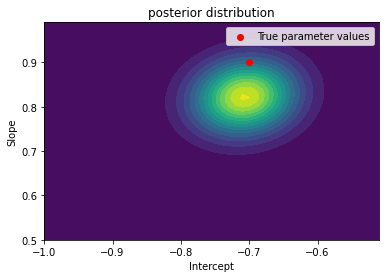

In [30]:
# Compute the posterior distribution
posterior_mean = np.dot(inverse_mat, np.dot(feature_matrix.T, noisy_labels))
posterior_cov = noise_var * inverse_mat

posterior = multivariate_normal(posterior_mean, posterior_cov)

# Plot the posterior distribution
fig = plt.figure()
mesh_features, mesh_labels = np.mgrid[-1.0:-0.5:.01, 0.5:1.0:.01]
pos = np.dstack((mesh_features, mesh_labels))
plt.contourf(mesh_features, mesh_labels, posterior.pdf(pos), levels=15)
plt.scatter(intercept, slope, color='red', label="True parameter values")
plt.title("posterior distribution")
plt.xlabel("Intercept")
plt.ylabel("Slope")
plt.legend();

In [34]:
# Check posterior predictive distribution
n_test_points = 10

test_points = np.random.uniform(lower_bound, upper_bound, n_test_points)



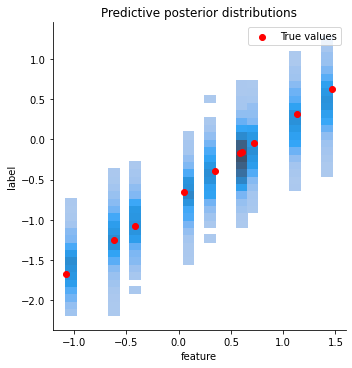

In [47]:
import pandas as pd
import seaborn as sns

all_rows = []
sample_size = 1000

true_labels = slope * test_points + intercept

for point in test_points:
    test_features = np.stack((np.ones(1), np.array([point])), axis=1)
    pred_mean = test_features.dot(posterior_mean)
    pred_cov = test_features.dot(posterior_cov.dot(test_features.T)) + noise_var
    predictive = univariate_normal(pred_mean[i].flatten(), pred_cov)
    
    sample_predicted_labels = predictive.rvs(size=sample_size)
    for label in sample_predicted_labels:
        all_rows.append([point, label])
    
all_data = pd.DataFrame(all_rows, columns=["feature", "label"]) 
sns.displot(data=all_data, x="feature", y="label")
plt.scatter(x=test_points, y=true_labels, color="red", label="True values")
plt.title("Predictive posterior distributions")
plt.legend()
plt.plot();
